In [1]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Proj 2: Fun with Filters and Frequencies!
#CS 180 FALL 25 - Maria Rufova - DUE 9/26/2025
import cv2
import numpy as np
import skimage as sk
import skimage.io as skio
import skimage.transform as transform
import time #added to compare 4-loop, 2-loop, and 2dcolvolve
#compare to convolve2d
from scipy.signal import convolve2d
#to actually see my convolutions
import matplotlib.pyplot as plt
#for Part 1.3
import math

In [3]:
#Part 1: Fun with Filters and Frequencies
#Part 1.1: COnvolutions from Scratch!
imname = "./images/me-min.jpg" #input file
im = skio.imread(imname)
im = sk.img_as_float(im)

#grayscale = averaging out RGB on every pixel = (R + G + B) / 3 = mean grey value
im_grayscale = np.mean(im, axis = 2)

# 1. Implement convolution with 4 loops
def conv_four(image, filter):
    img_h, img_w = image.shape
    filter_h, filter_w = filter.shape

    #padding with zero fill values
    padding_h = filter_h // 2
    padding_w = filter_w // 2
    img_padded = np.zeros((img_h + 2 * padding_h, img_w + 2 * padding_w))
    img_padded[padding_h : padding_h + img_h, padding_w:padding_w + img_w] = image

    colvolved_img = np.zeros((img_h, img_w))

    #flip the filter before actually convolling
    flip_filter = np.fliplr(np.flipud(filter))

    #the loopty loops
    for i in range(img_h):
        for j in range(img_w):
            for x in range(filter_h):
                for y in range(filter_w):
                    colvolved_img[i, j] += img_padded[i+x, j+y] * flip_filter[x, y]
    return colvolved_img

# 2. Implement convolution with 2 loops
def conv_two(image, filter):
    img_h, img_w = image.shape
    filter_h, filter_w = filter.shape

    #padding with zero fill values
    padding_h = filter_h // 2
    padding_w = filter_w // 2
    img_padded = np.zeros((img_h + 2 * padding_h, img_w + 2 * padding_w))
    img_padded[padding_h : padding_h + img_h, padding_w:padding_w + img_w] = image

    convolved_img = np.zeros((img_h, img_w))

    #flip the filter before actually convolling
    flip_filter = np.fliplr(np.flipud(filter))

    #the loopty loops
    for i in range(img_h):
        for j in range(img_w):
            #take fliter-sized bite of the image you're convolving with
            overlay = img_padded[i : i + filter_h, j : j + filter_w]
            convolved_img[i, j] = np.sum(overlay * flip_filter)

    return convolved_img

#Comparing 4-loop, 2-loop, and scipy.signal.convolve2d concolutions!
#+ 3. Convolving my pic with box filter 9x9 box filter
box_filter = np.ones((9, 9)) / 81 #filter + normalizing
result_scipy = convolve2d(im_grayscale, box_filter, mode='same')

# print("Convolving my picture with 9x9 box filter: ")
# print(f"9x9 Box Filter:  {box_filter}")

# print("time 4-loop convolution: ")
# start_time = time.time()
# result_4loop = conv_four(im_grayscale, box_filter)
# end_time = time.time()
# print(f"4-loop convolution took: {end_time - start_time} seconds")

# print("time 2-loop convolution: ")
# start_time = time.time()
# result_2loop = conv_two(im_grayscale, box_filter)
# end_time = time.time()
# print(f"2-loop convolution took: {end_time - start_time} seconds")

# print("time scipy.signal.convolve2d: ")
# start_time = time.time()
# result_scipy = convolve2d(im_grayscale, box_filter, mode='same')
# end_time = time.time()
# print(f"scipy convolution took: {end_time - start_time} seconds")


#4. Convolve my picture with Dx and Dy
Dx = np.array([[1, 0, -1]])
Dy = np.array([[1], [0], [-1]])

print(f"Dx = {Dx}")
print(f"Dy = {Dy}")

#4-loop
print("Dx with 4-loop: ")
start_time = time.time()
dx_4loop = conv_four(im_grayscale, Dx)
end_time = time.time()
print(F"{end_time - start_time} seconds")

print("Dy with 4-loop: ")
start_time = time.time()
dy_4loop = conv_four(im_grayscale, Dy)
end_time = time.time()
print(F"{end_time - start_time} seconds")

#2-loop
print("Dx with 2-loop: ")
start_time = time.time()
dx_2loop = conv_two(im_grayscale, Dx)
end_time = time.time()
print(F"{end_time - start_time} seconds")

print("Dy with 2-loop: ")
start_time = time.time()
dy_2loop = conv_two(im_grayscale, Dy)
end_time = time.time()
print(F"{end_time - start_time} seconds")

#scipy
print("Dx with convolve2D: ")
start_time = time.time()
dx_scipy = convolve2d(im_grayscale, Dx, mode='same')
end_time = time.time()
print(F"{end_time - start_time} seconds")

print("Dy with convolve2D: ")
start_time = time.time()
dy_scipy = convolve2d(im_grayscale, Dy, mode='same')
end_time = time.time()
print(F"{end_time - start_time} seconds")




Dx = [[ 1  0 -1]]
Dy = [[ 1]
 [ 0]
 [-1]]
Dx with 4-loop: 
11.820356130599976 seconds
Dy with 4-loop: 
12.686034917831421 seconds
Dx with 2-loop: 
24.31172490119934 seconds
Dy with 2-loop: 
24.25342297554016 seconds
Dx with convolve2D: 
0.11892819404602051 seconds
Dy with convolve2D: 
0.13548588752746582 seconds


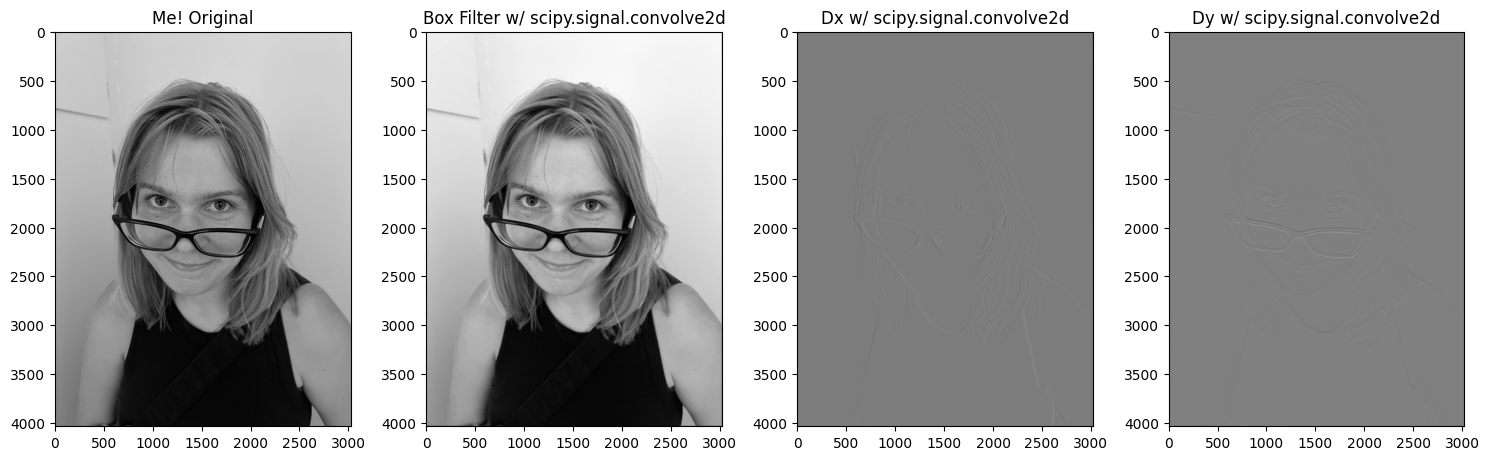

In [4]:
#actually see the convlution resuts:

plt.figure(figsize=(15, 10))

#original
plt.subplot(2, 4, 1)
plt.imshow(im_grayscale, cmap='gray')
plt.title("Me! Original")

#Box Filter
plt.subplot(2, 4, 2)
plt.imshow(result_scipy, cmap='gray')
plt.title("Box Filter w/ scipy.signal.convolve2d")

#Dx
plt.subplot(2, 4, 3)
plt.imshow(dx_scipy, cmap='gray')
plt.title("Dx w/ scipy.signal.convolve2d")

#Dy
plt.subplot(2, 4, 4)
plt.imshow(dy_scipy, cmap='gray')
plt.title("Dy w/ scipy.signal.convolve2d")

plt.tight_layout()
plt.show()

1. Partial Derivatives of finite difference operators Dx and Dy: 
2. Compute Gradient Magnitude: 
3. Turning into an edge image: 


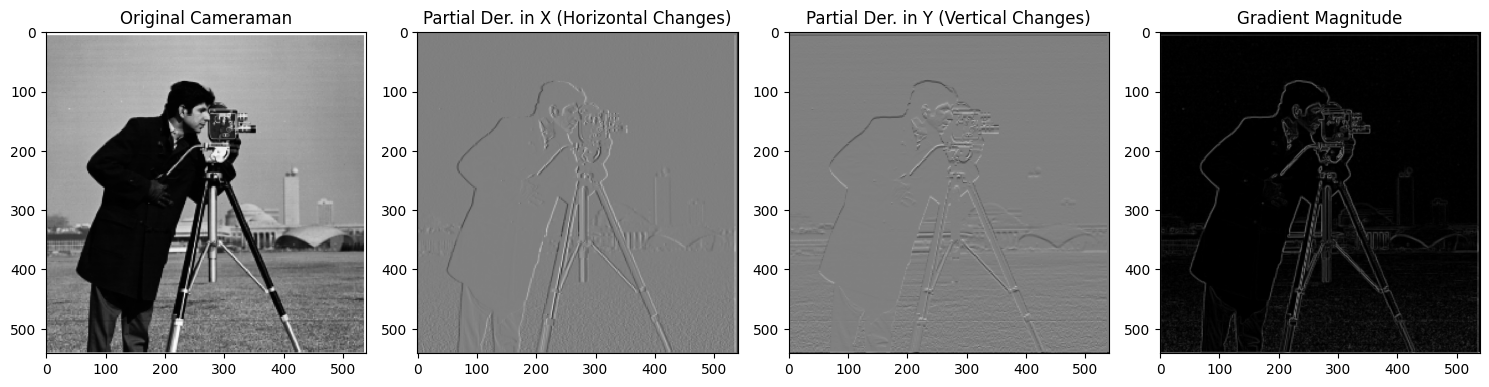

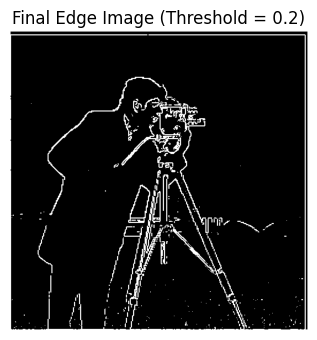

In [5]:
#Part 1.2: Finite Difference Operator

#1. Show the partial derivative in the x an y of the cameraman image by convolving the image with the finite difference operators Dx and Dy
#2. Compute and show the gradient magnitude image
#3. Turn this into an edge image by binarizing the gradient magnitude by picking the appropriate threshold (trying to suppress the noise while showing all the real edges)

imname = "./images/cameraman.png" #input file
im = skio.imread(imname)
im = sk.img_as_float(im)

im_grayscale = np.mean(im, axis = 2)

#Dx and Dy defined above (Dx = np.array([[1, 0, -1]]) Dy = np.array([[1], [0], [-1]]))

#1. Show the partial derivative in the x an y of the cameraman image by convolving the image with the finite difference operators Dx and Dy
print("1. Partial Derivatives of finite difference operators Dx and Dy: ")
der_dx = convolve2d(im_grayscale, Dx, mode='same', boundary='fill', fillvalue=0) #hor changes
der_dy = convolve2d(im_grayscale, Dy, mode='same', boundary='fill', fillvalue=0) #ver changes

#2. Compute the gradient magnitude image --> combines info from both hor changes and ver changes 
print("2. Compute Gradient Magnitude: ") #pytagorean: a^2 + b^2 = c^2
gradient_magnitude = np.sqrt(der_dx ** 2 + der_dy ** 2)

#3. Turn this into an edge image by binarizing the gradient magnitude by picking the appropriate threshold (trying to suppress the noise while showing all the real edges)
print("n edge image: ")
#trying out a couple of thresholds
thresholds = [0.01, 0.05, 0.08, 0.1, 0.15, 0.20, 0.25, 0.3, 0.35]
#each threshold makes its own edge image variant
edge_imgs = []
for t in thresholds:
    #compare each pixel in gradient_mag with the current t
    # binarize the gm = create a boolean array where True is >t and False is <= t
    em = gradient_magnitude > t
    edge_imgs.append(em)

#actually see the resuts:

plt.figure(figsize=(15, 10))

#original
plt.subplot(1, 4, 1)
plt.imshow(im_grayscale, cmap='gray')
plt.title("Original Cameraman")

#Der Dx
plt.subplot(1, 4, 2)
plt.imshow(der_dx, cmap='gray')
plt.title("Partial Der. in X (Horizontal Changes)")

#Der Dy
plt.subplot(1, 4, 3)
plt.imshow(der_dy, cmap='gray')
plt.title("Partial Der. in Y (Vertical Changes)")

#Gradient Magnitude Image
plt.subplot(1, 4, 4)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")


plt.tight_layout()
plt.show()

''' 
#plotted a few different em's with diff t's to figure out which is the best

plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(edge_imgs[i], cmap='gray')
    plt.title(f"Edge Image t={thresholds[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i in range(5, 9):
    plt.subplot(2, 2, i-4)
    plt.imshow(edge_imgs[i], cmap='gray')
    plt.title(f"Edge Image t={thresholds[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
'''
best = 0.2
final_edge_image = gradient_magnitude > best

plt.subplot(1, 2, 2)
plt.imshow(final_edge_image, cmap='gray')
plt.title(f'Final Edge Image (Threshold = {best})')
plt.axis('off')

plt.tight_layout()
plt.show()

Compute Gradient Magnitude: 


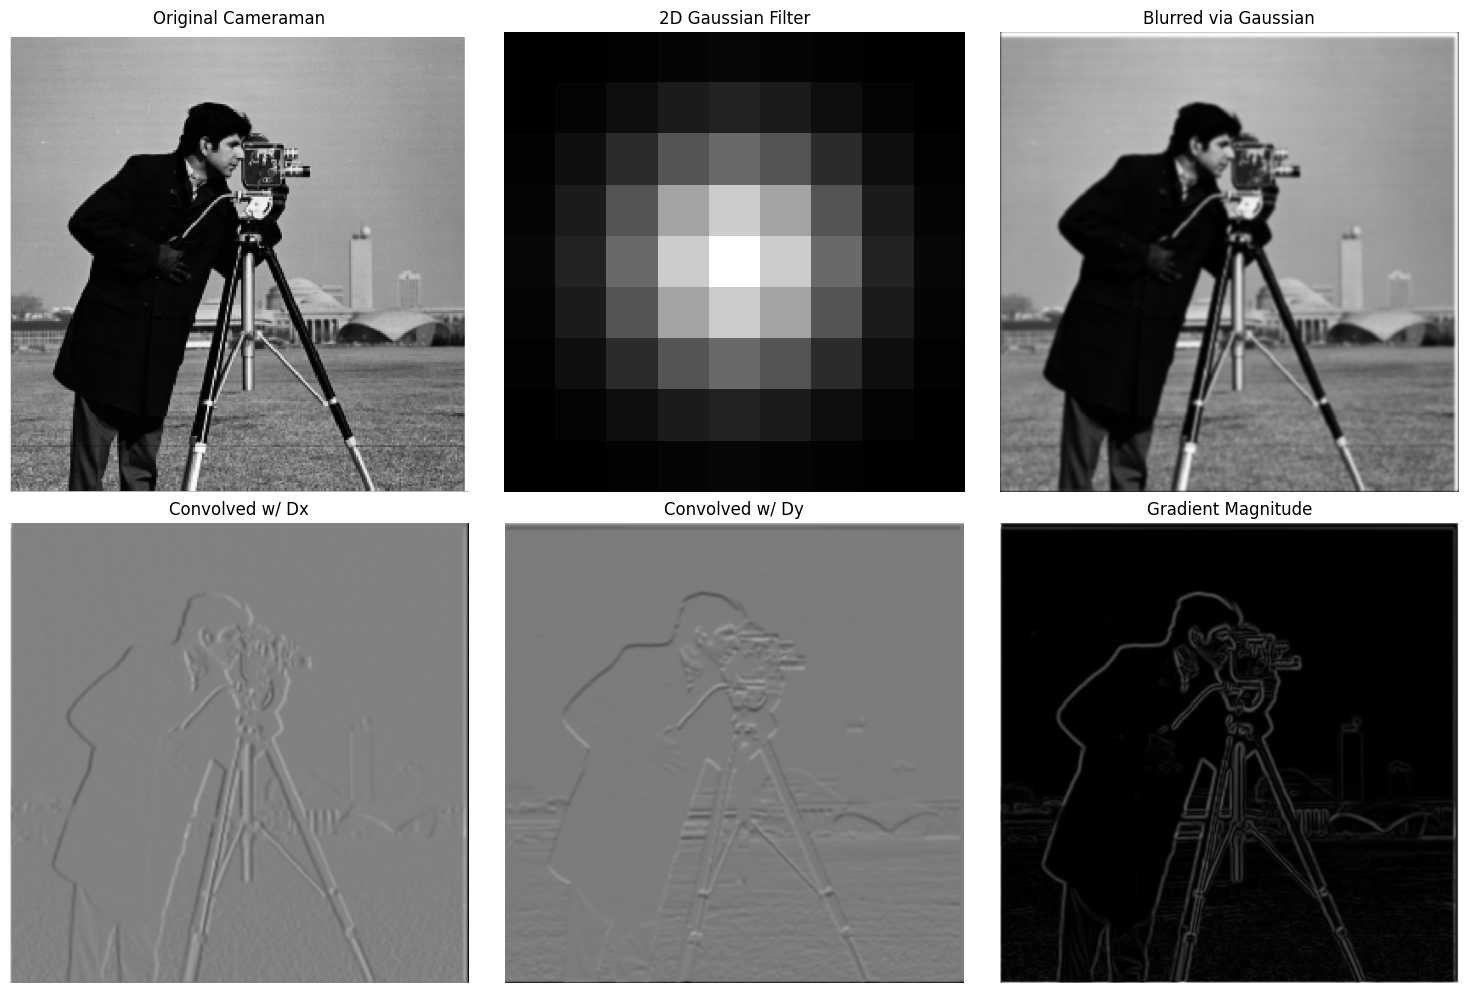

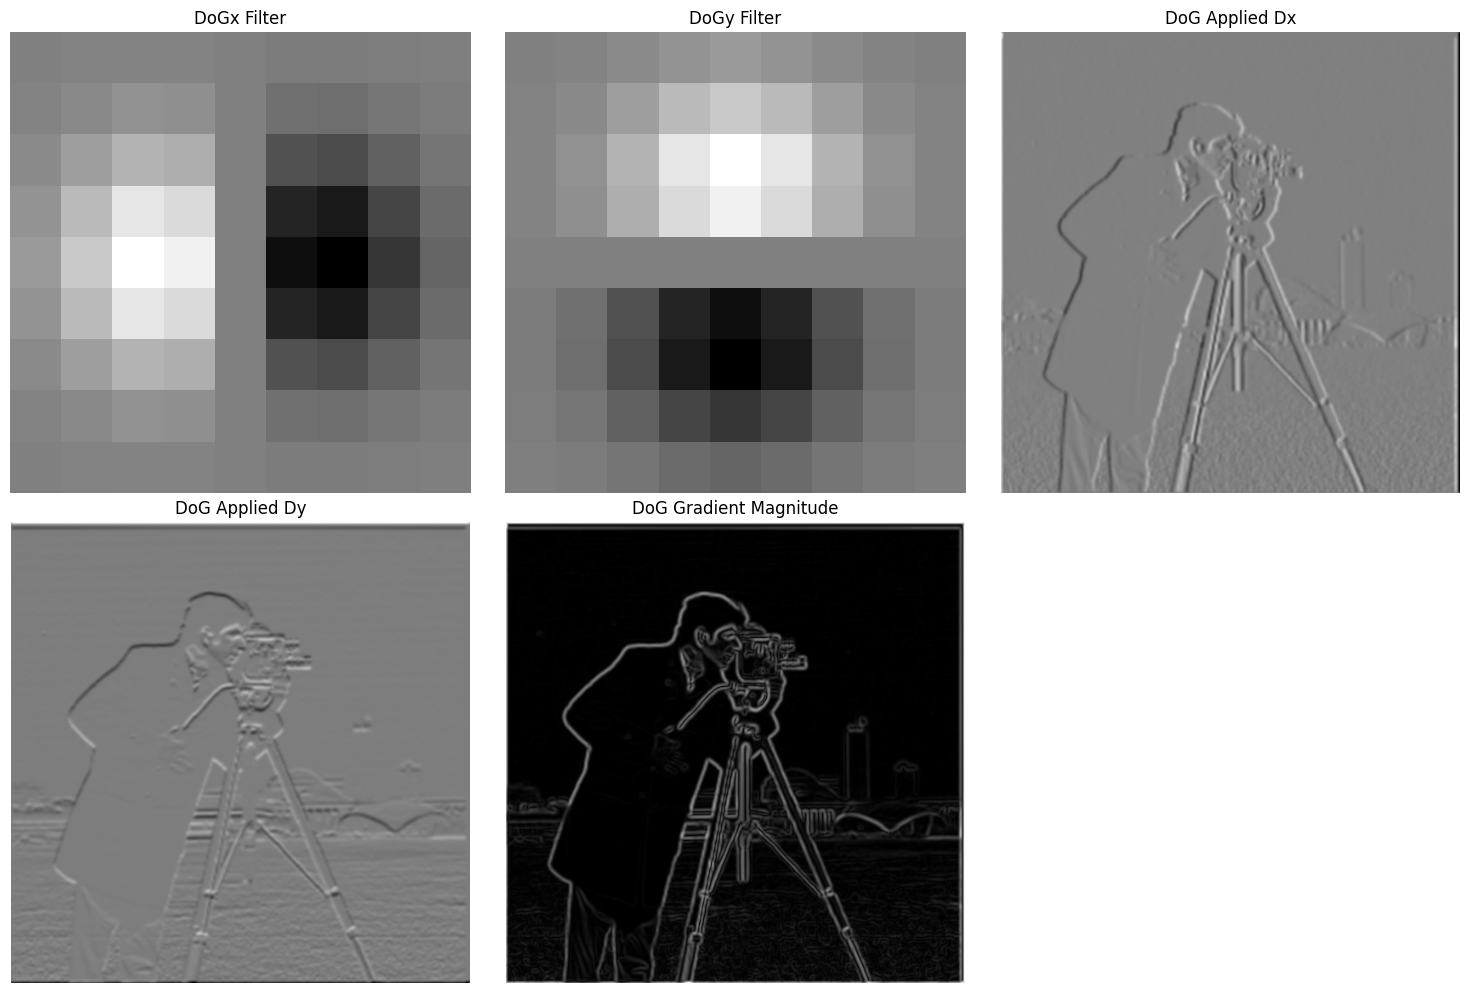

In [6]:
#Part 1.3: Derivative of Gaussian (DoG) filter

#imported cv2 for this part at the top with all other imports
'''
1. Create a blurred version of the original image by convolving with a gaussian and repeat the procedure in the previous part 
(one way to create a 2D gaussian filter is by using cv2.getGaussianKernel() 
to create a 1D gaussian and then taking an outer product with its transpose to get a 2D gaussian kernel).
'''
# getGaussianKernel: https://www.geeksforgeeks.org/python/python-opencv-getgaussiankernel-function/# 
#Syntax: cv.getGaussianKernel(ksize, sigma[, ktype])
#ksize is odd and positive, (3, 5, 7, 9), usually k = 9 is standard
# from this, sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8  --> sigma = 1.5

ksize = 9
sigma = 1.5
# 1st part: use a 1D Gaussian to create a 2D Gussian
gaussian_1d = cv2.getGaussianKernel(ksize, sigma)
gaussian_2d = (np.outer(gaussian_1d, gaussian_1d.T)) / np.sum(gaussian_1d)

im_blurred = convolve2d(im_grayscale, gaussian_2d, mode='same', boundary = 'fill')

der_dx_blurred = convolve2d(im_blurred, Dx, mode='same', boundary='fill', fillvalue=0) #hor changes
der_dy_blurred = convolve2d(im_blurred, Dy, mode='same', boundary='fill', fillvalue=0) #ver changes

#compute gradient mag, pytagorean: a^2 + b^2 = c^2
gradient_magnitude = np.sqrt(der_dx_blurred ** 2 + der_dy_blurred ** 2)

#2nd part: same thing with a single convolution instead of two by creating a derivative of gaussian filters
DoGx = convolve2d(gaussian_2d, Dx, mode='same')
DoGy = convolve2d(gaussian_2d, Dy, mode='same')

der_dogx = convolve2d(im_grayscale, DoGx, mode='same', boundary='fill', fillvalue=0)
der_dogy = convolve2d(im_grayscale, DoGy, mode='same', boundary='fill', fillvalue=0)
gradient_magnitude_dog = np.sqrt(der_dogx ** 2 + der_dogy ** 2)

#Part 1
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(im_grayscale, cmap='gray')
plt.title('Original Cameraman')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(gaussian_2d, cmap='gray')
plt.title('2D Gaussian Filter')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(im_blurred, cmap='gray')
plt.title('Blurred via Gaussian')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(der_dx_blurred, cmap='gray')
plt.title('Convolved w/ Dx')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(der_dy_blurred, cmap='gray')
plt.title('Convolved w/ Dy')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()


# art 2
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(DoGx, cmap='gray')
plt.title('DoGx Filter')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(DoGy, cmap='gray')
plt.title('DoGy Filter')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(der_dogx, cmap='gray')
plt.title('DoG Applied Dx')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(der_dogy, cmap='gray')
plt.title('DoG Applied Dy')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(gradient_magnitude_dog, cmap='gray')
plt.title('DoG Gradient Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()


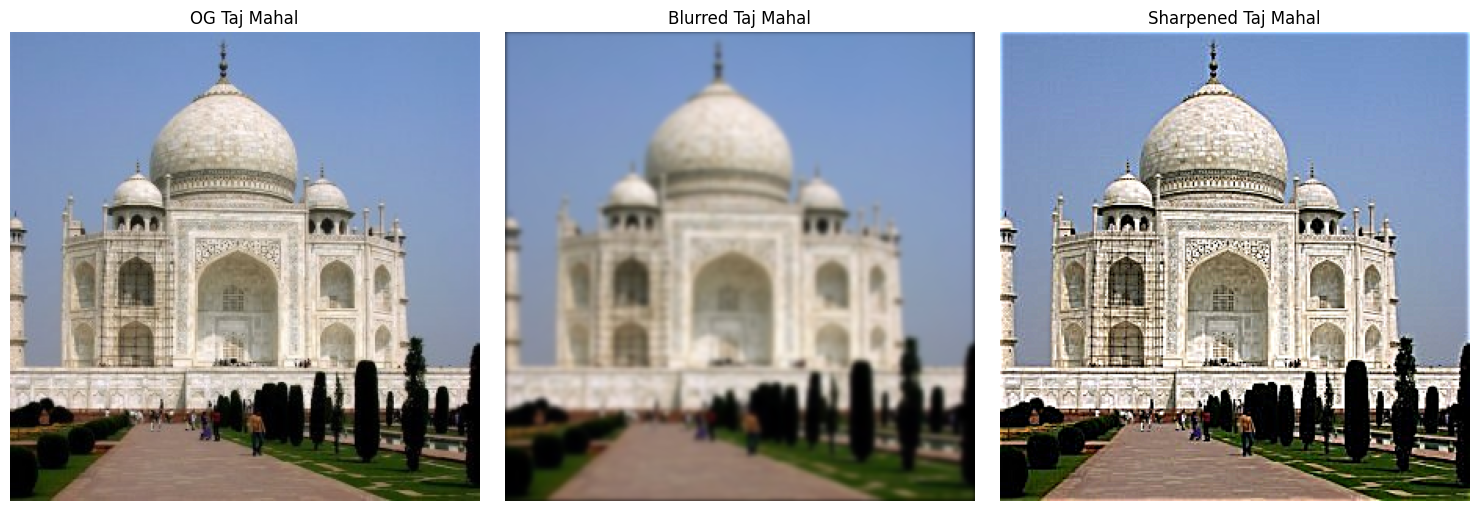

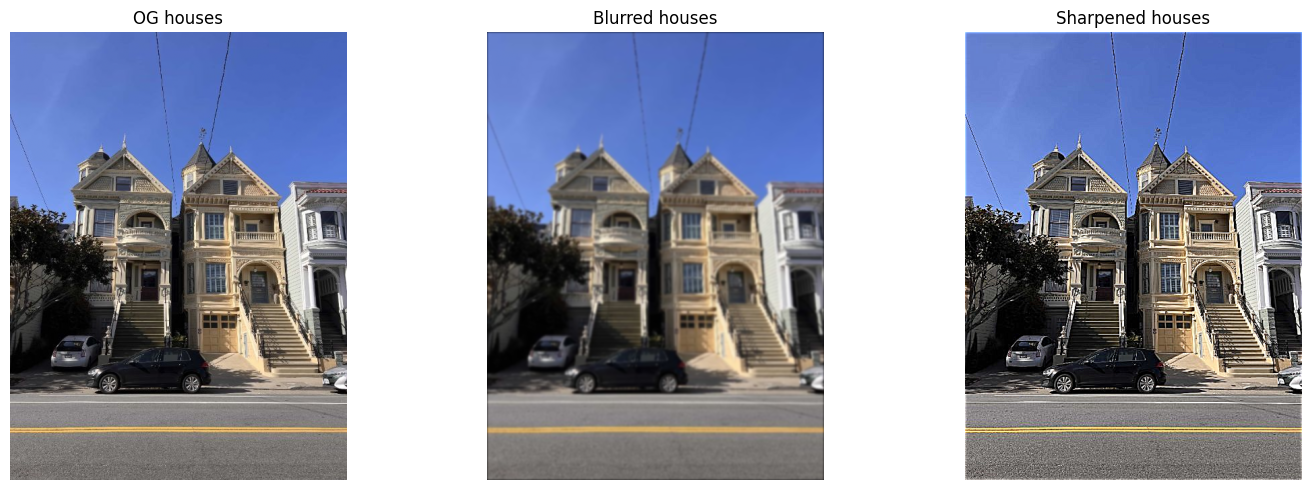

In [17]:
# Part 2: Fun with Frequencies!

#Part 2.1: Image "Sharpening"
imname = "./images/taj.jpg" #input file = taj maha;l
im = skio.imread(imname)
im = sk.img_as_float(im)

'''
We will derive the unsharp masking technique. Remember our favorite Gaussian filter from class. 
This is a low pass filter that retains only the low frequencies. 
We can subtract the blurred version from the original image to get the high frequencies of the image. 
An image often looks sharper if it has stronger high frequencies. So, lets add a little bit more high frequencies to the image! 
Combine this into a single convolution operation which is called the unsharp mask filter
'''

#I used texbook Chapter 3.2 "Linear Filtering" here
# also: https://homepages.inf.ed.ac.uk/rbf/HIPR2/unsharp.htm 
'''
Fsharp(x, y) = f(x, y) + k * g(x, y) 

k = scaling const, reasonable values are btw 0.2 and 3.0, where larger values = more sharpening
'''
ksize = 9
sigma = 1.5

#Gaussian filter
gaussian_1d = cv2.getGaussianKernel(ksize, sigma)
gaussian_2d = np.outer(gaussian_1d, gaussian_1d.T)

#high frequenciest = og - blurred version
#use the gaussian to blurt the original first
#im_blurred = convolve2d(im, gaussian_2d, mode='same', boundary = 'fill', fillvalue = 0) #this is for 2D, didn't  work on 3 channel
im_blurred = np.zeros_like(im)
for channel in range(im.shape[2]):
    im_blurred[:, :, channel] = convolve2d(im[:, :, channel], gaussian_2d, mode='same', boundary='fill', fillvalue=0)

high_freqs = im - im_blurred

#add the high_freqs to the og image to sharpen it, don't forget the scaling constant k
scaling = 1.5
im_sharp = im + scaling * high_freqs
#clip the pixel vals so that they don't accidentally exceed 1 (bc we're adding highest freqs)
im_sharp = np.clip(im_sharp, 0, 1)

#"Combine this into a single convolution operation which is called the unsharp mask filter"
im_identity = np.zeros_like(gaussian_2d)
center = ksize // 2
im_identity[center, center] = 1
unsharp_mask_filter = im_identity + scaling * (im_identity - gaussian_2d)

im_sharp_filter = np.zeros_like(im)
for channel in range(im.shape[2]):
    im_sharp_filter[:, :, channel] = convolve2d(im[:, :, channel], unsharp_mask_filter, mode='same', boundary='fill', fillvalue=0)
im_sharp_filter = np.clip(im_sharp_filter, 0, 1) 

#another test image: houses in San Francisco
imname_test = "./images/houses.jpg"
im_houses = skio.imread(imname_test)
im_houses = sk.img_as_float(im_houses)

#blur
houses_blurred = np.zeros_like(im_houses)
for channel in range(im_houses.shape[2]):
    houses_blurred[:, :, channel] = convolve2d(im_houses[:, :, channel], gaussian_2d, mode='same', boundary='fill', fillvalue=0)

#sharpen using filter
houses_sharp_filter = np.zeros_like(im_houses)
for channel in range(im_houses.shape[2]):
    houses_sharp_filter[:, :, channel] = convolve2d(im_houses[:, :, channel], unsharp_mask_filter, mode='same', boundary='fill', fillvalue=0)
houses_sharp_filter = np.clip(houses_sharp_filter, 0, 1)

#Taj Mahal
plt.figure(figsize=(15, 5))

#original
plt.subplot(1, 3, 1)
plt.imshow(im)
plt.title('OG Taj Mahal')
plt.axis('off')

#blurred
plt.subplot(1, 3, 2)
plt.imshow(im_blurred)
plt.title('Blurred Taj Mahal')
plt.axis('off')

#unsharp mask filter
plt.subplot(1, 3, 3)
plt.imshow(im_sharp_filter)
plt.title('Sharpened Taj Mahal')
plt.axis('off')

plt.tight_layout()
plt.show()

#Me with houses
plt.figure(figsize=(15, 5))

#original
plt.subplot(1, 3, 1)
plt.imshow(im_houses)
plt.title('OG houses')
plt.axis('off')

#blurred
plt.subplot(1, 3, 2)
plt.imshow(houses_blurred)
plt.title('Blurred houses')
plt.axis('off')

#unsharp mask filter
plt.subplot(1, 3, 3)
plt.imshow(houses_sharp_filter)
plt.title('Sharpened houses')
plt.axis('off')

plt.tight_layout()
plt.show()

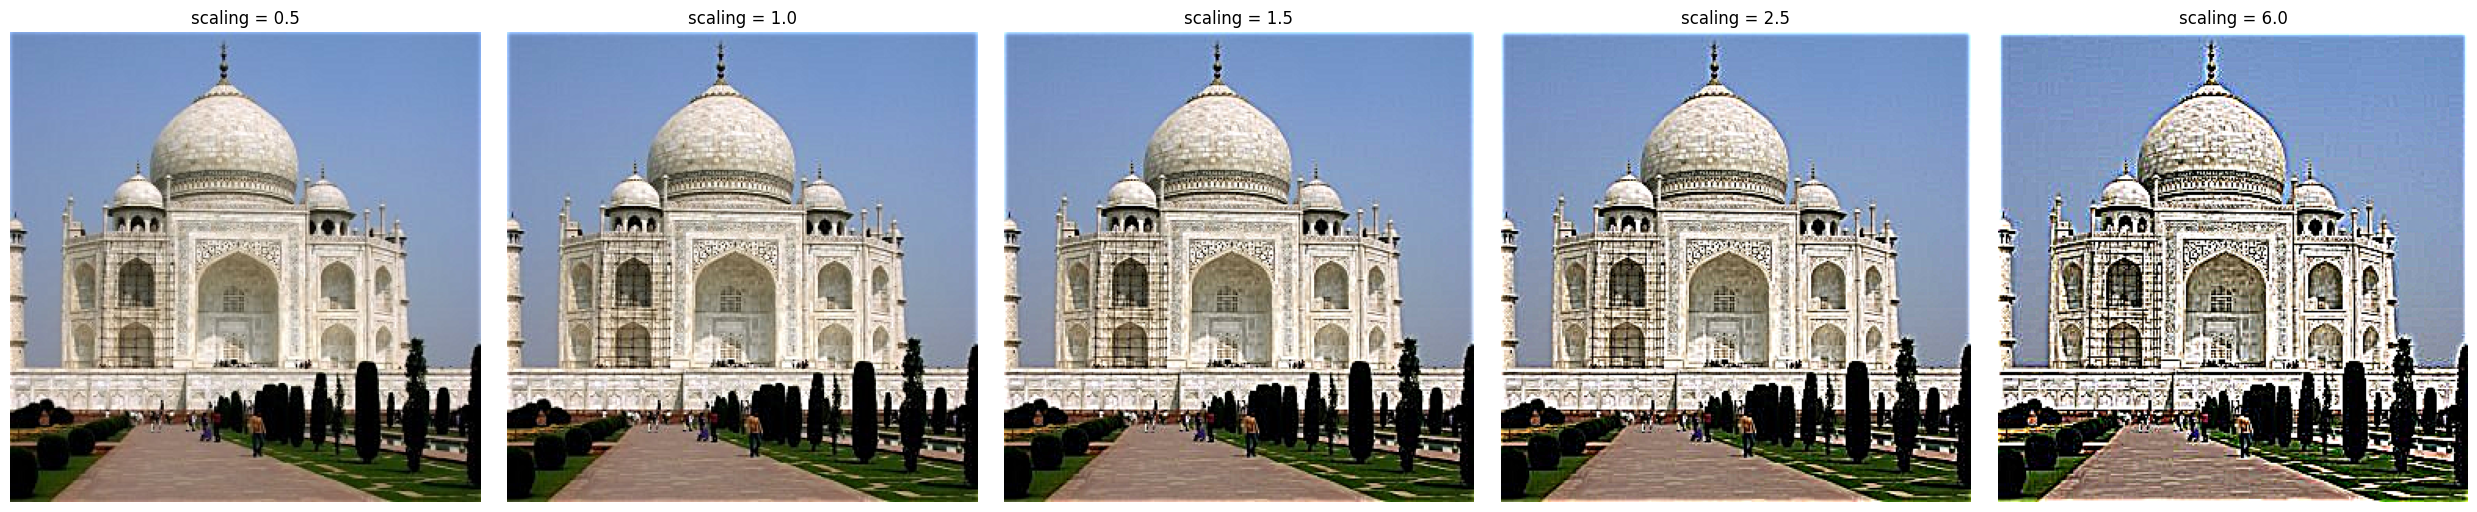

In [19]:
#rubric got updated: comparing different sharpening amounts
sharpening_amounts = [0.5, 1.0, 1.5, 2.5, 6.0]
outputs = []

for scaling in sharpening_amounts:
    unsharp_mask_filter = im_identity + scaling * (im_identity - gaussian_2d)
    im_sharp_filter = np.zeros_like(im)

    for channel in range(im.shape[2]):
        im_sharp_filter[:, :, channel] = convolve2d(im[:, :, channel], unsharp_mask_filter, mode='same', boundary='fill', fillvalue=0)
    im_sharp_filter = np.clip(im_sharp_filter, 0, 1) 
    outputs.append((scaling, im_sharp_filter))

plt.figure(figsize=(25, 5))
for i, (scaling, im_sharp_filter) in enumerate(outputs, 1):
    plt.subplot(1, len(outputs), i)
    plt.imshow(im_sharp_filter)
    plt.title(f"scaling = {scaling}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [8]:
#Part 2.2 Hybrid Images:

#done separately in 'hybrid_image_starter.py'

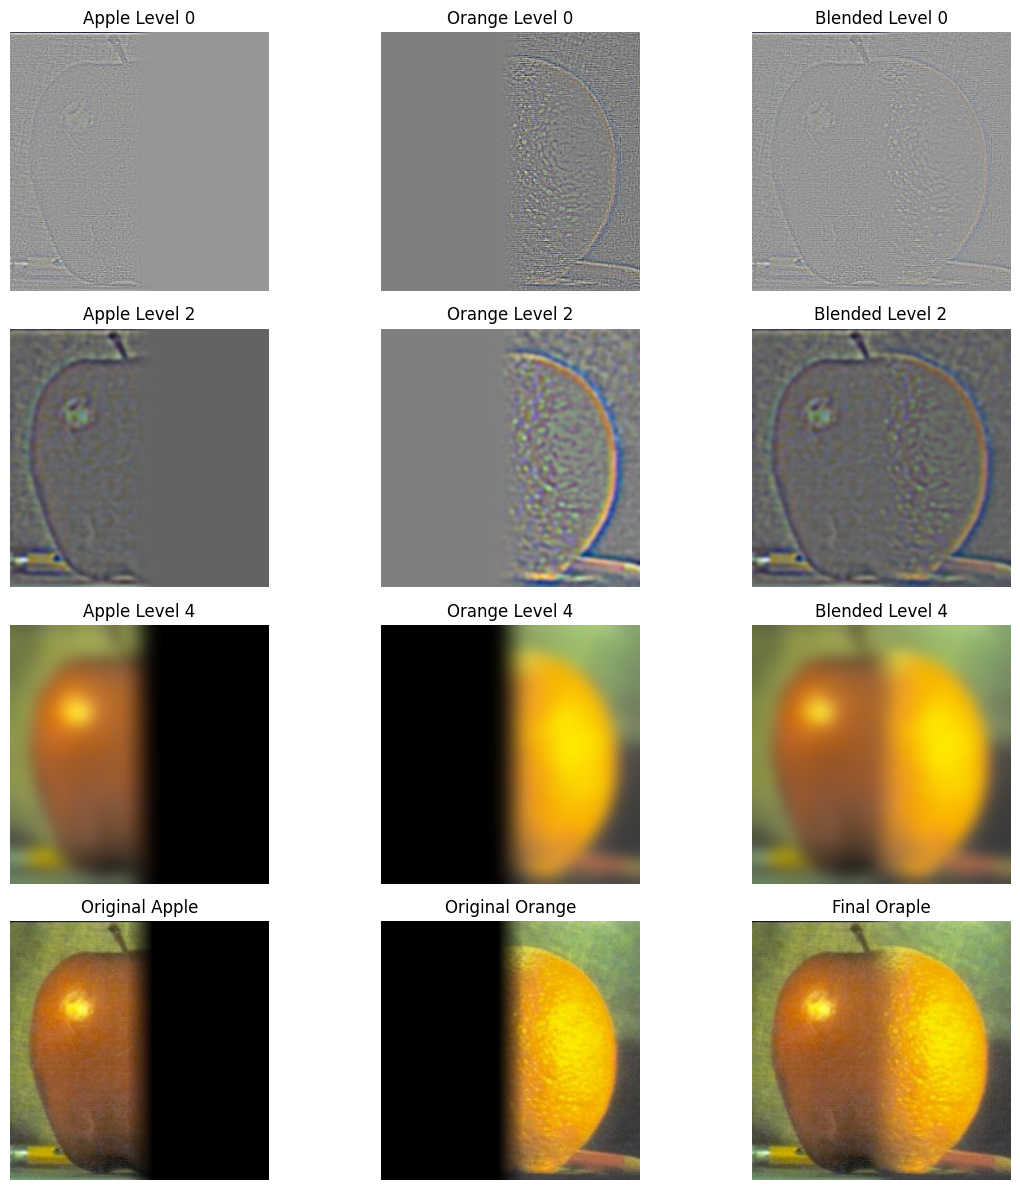

In [24]:
# Multi-Resolution Blending and the Oralpe JOurney (parts 2.3 + 2.4)
#Part 2.3: Gaussian and Laplacian Stacks

imname = "./images/apple.jpeg"
im = skio.imread(imname)
im_apple = sk.img_as_float(im)

imname = "./images/orange.jpeg"
im = skio.imread(imname)
im_orange = sk.img_as_float(im)

#1. implementing a Gaussian and a Laplacian Stack

#creating gaussians function resused from Part 2.2
def create_gaussian(sigma):

    ksize = 2 * math.ceil(3 * sigma) + 1 #common formula for gaussian kernel size (.ceil rounds to nearest int)
    ksize = ksize + 1 if ksize%2 == 0 else ksize #kernel needs to be odd sized

    gaussian_1d = cv2.getGaussianKernel(ksize, sigma)
    gaussian_2d = np.outer(gaussian_1d, gaussian_1d.T)
    return gaussian_2d

#same size for each level, NO DOWNSAMPLIEG
def gaussian_stack(image, levels):
    #level 0 is the oiginal
    gaussian_stack = [image] 
    sigmas = [1.0, 2.0, 4.0, 8.0, 16.0] #blurrier and blurrier with each level

    for i in range(1, levels):
        filter = create_gaussian(sigmas[i-1])

        if image.ndim == 3:
            img_blurred = np.zeros_like(image)
            for channel in range(3):
                img_blurred[:, :, channel] = convolve2d(image[:, :, channel], filter, mode='same', boundary='symm')
            gaussian_stack.append(img_blurred)
        else:
            img_blurred = convolve2d(image, filter, mode='same', boundary='symm' )
            gaussian_stack.append(img_blurred)
    return gaussian_stack

def laplacian_stack(gaussian_stack):
    #lap levee[i] = gauss level[i] - gauss level[i+1]
    laplacian_stack = []
    for i in range(len(gaussian_stack) - 1):
        level = gaussian_stack[i] - gaussian_stack[i+1]
        laplacian_stack.append(level)

    #fix: last level of LS is last level of GS
    laplacian_stack.append(gaussian_stack[-1])

    return laplacian_stack


#2. Using the G and L stacks on Oraple example
levels = 5
gauss_stack_apple = gaussian_stack(im_apple, levels)
gauss_stack_orange = gaussian_stack(im_orange, levels)

lap_stack_apple = laplacian_stack(gauss_stack_apple)
lap_stack_orange = laplacian_stack(gauss_stack_orange)

#split so that th e left side if apple and the right is oragne
rows, cols, channels = im_apple.shape
mask = np.zeros((rows, cols))
spline = 30
left_boundary = cols//2 - spline//2
right_boundary = cols//2 + spline//2
mask[:, :left_boundary] = 1 #apple on left
mask[:, right_boundary:] = 0
mask[:, cols//2-10:cols//2+10] = np.linspace(1, 0, 20)

for col in range(left_boundary, right_boundary):
    mask[:, col] = 1 - (col - left_boundary) / (spline)

mask = np.clip(mask, 0, 1)

gauss_stack_mask = gaussian_stack(mask, levels)

def blend_stacks(lap_apple, lap_orange, gauss_mask):
    laplacian_blend = []
    for i in range(len(lap_apple)):
        gm = gauss_mask[i][:, :, None]
        laplacian_blend.append(gm * lap_apple[i] + (1 - gm) * lap_orange[i])
    return laplacian_blend

blended_stack = blend_stacks(lap_stack_apple, lap_stack_orange, gauss_stack_mask)
#making the Burt and Adelson 1983 visual from paper (Figure 3.42)
#first 3 rows show the high, med, and low freq parts of the Lap pyr (from levels 0, 2, 4)

def rebuild_ls(lap_stack):
    img = lap_stack[-1]
    for i in range(len(lap_stack)-2, -1, -1):
        img = lap_stack[i] + img
    return img

oraple = rebuild_ls(blended_stack)
oraple = np.clip(oraple, 0, 1)

def show_level(frame, img, title):
    norm = (img - img.min()) / (img.max() - img.min() + 1e-8)
    frame.imshow(norm)
    frame.set_title(title)
    frame.axis("off")


levels = [0, 2, 4]

figure, portion = plt.subplots(4, 3, figsize=(12, 12))

for row, level in enumerate(levels):
    gm = gauss_stack_mask[level][:, :, None]
    apple_part = lap_stack_apple[level] * gm
    orange_part = lap_stack_orange[level] * (1 - gm)
    blend_part = blended_stack[level]

    show_level(portion[row, 0], apple_part, f"Apple Level {level}")
    show_level(portion[row, 1], orange_part, f"Orange Level {level}")
    show_level(portion[row, 2], blend_part, f"Blended Level {level}")   

portion[3, 0].imshow(im_apple * mask[..., None])
portion[3, 0].set_title("Original Apple")
portion[3, 0].axis("off")

portion[3, 1].imshow(im_orange * (1 - mask[..., None]))
portion[3, 1].set_title("Original Orange")
portion[3, 1].axis("off")

portion[3, 2].imshow(np.clip(oraple, 0, 1))
portion[3, 2].set_title("Final Oraple")
portion[3, 2].axis("off")


plt.tight_layout()
plt.show()




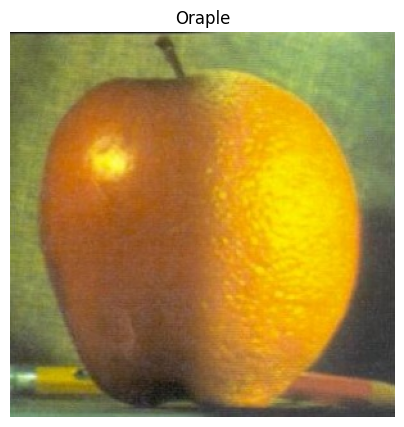

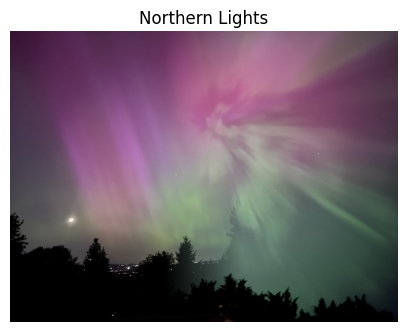

In [25]:
#Part 2.4: MultiResolution Blending

#Just the Oraple again
plt.figure(figsize=(5, 5))
plt.imshow(np.clip(oraple, 0, 1))
plt.axis("off")
plt.title("Oraple")
plt.show()

#northern lights stitch
imname1 = "./images/lights_1.jpg"
imname2 = "./images/lights_2.jpg"

im1 = sk.img_as_float(skio.imread(imname1))
im2 = sk.img_as_float(skio.imread(imname2))
rows, cols, channels = im1.shape
im2 = sk.transform.resize(im2, (rows, cols), anti_aliasing=True)

levels=5
gauss_stack1 = gaussian_stack(im1, levels)
gauss_stack2 = gaussian_stack(im2, levels)
lap_stack1 = laplacian_stack(gauss_stack1)
lap_stack2 = laplacian_stack(gauss_stack2)

spline = cols // 5
left_boundary = cols//2 - spline//2
right_boundary = cols//2 + spline//2

mask = np.zeros((rows, cols))
mask[:, :left_boundary] = 1
mask[:, right_boundary:] = 0
mask[:, left_boundary:right_boundary] = np.linspace(1, 0, right_boundary - left_boundary)[None, :]

gauss_stack_mask = gaussian_stack(mask, levels)

blended_stack = blend_stacks(lap_stack1, lap_stack2, gauss_stack_mask)
blended_image = rebuild_ls(blended_stack)

plt.figure(figsize=(5, 5))
plt.imshow(np.clip(blended_image, 0, 1))
plt.axis("off")
plt.title("Northern Lights")
plt.show()

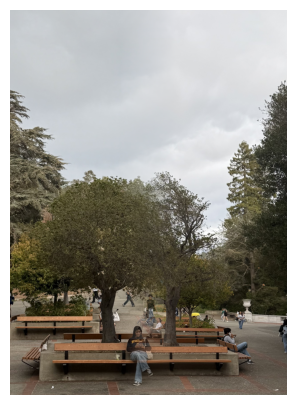

In [26]:
#benches stitch
imname1 = "./images/benches_1.jpg"
imname2 = "./images/benches_2.jpg"

im1 = sk.img_as_float(skio.imread(imname1))
im2 = sk.img_as_float(skio.imread(imname2))
rows, cols, channels = im1.shape
im2 = sk.transform.resize(im2, (rows, cols), anti_aliasing=True)

levels=5
gauss_stack1 = gaussian_stack(im1, levels)
gauss_stack2 = gaussian_stack(im2, levels)
lap_stack1 = laplacian_stack(gauss_stack1)
lap_stack2 = laplacian_stack(gauss_stack2)

spline = cols // 5
left_boundary = cols//2 - spline//2
right_boundary = cols//2 + spline//2

mask = np.zeros((rows, cols))
mask[:, :left_boundary] = 1
mask[:, right_boundary:] = 0
mask[:, left_boundary:right_boundary] = np.linspace(1, 0, right_boundary - left_boundary)[None, :]

gauss_stack_mask = gaussian_stack(mask, levels)

blended_stack = blend_stacks(lap_stack1, lap_stack2, gauss_stack_mask)
blended_image = rebuild_ls(blended_stack)

plt.figure(figsize=(5, 5))
plt.imshow(np.clip(blended_image, 0, 1))
plt.axis("off")
plt.show()

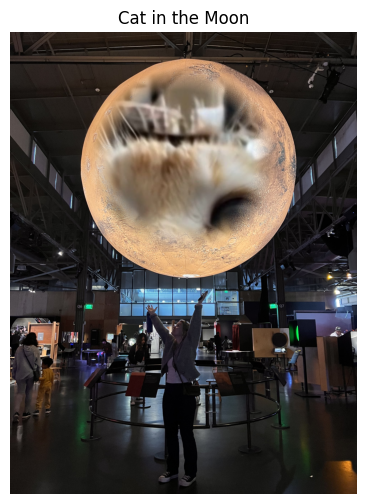

In [12]:
#irregular blend: circles
#it's a cat! it's a moon! it's a cat moon!
im_cat = sk.img_as_float(skio.imread("./images/cat-min.JPG"))
im_moon = sk.img_as_float(skio.imread("./images/moon.jpg"))

#issues with sizes, matched them up
rows, cols, channels = im_moon.shape
im_cat = sk.transform.resize(im_cat, (rows, cols), anti_aliasing=True)

#create an irregular circular mask for this
y, x = np.ogrid[:rows, :cols]
#tryin out different shifts of the mask on the cat, I want it too look like it's "peaking out" out of the moon
shift_up = rows // 5
center_y, center_x = rows // 2 - shift_up, cols // 2 #mask origin + radisu
radius = min(rows, cols) // 4
#check teh dist of each pizel from origin
# added +100 for some finetuning shifting
dist = np.sqrt((y - center_y + 100)**2 + (x - center_x)**2) 
#adjusting spline smoothing before making the final mask version
spline_width = radius // 3
mask = np.clip(1 - (dist - radius) / spline_width, 0, 1)

levels = 5
gauss_stack_cat = gaussian_stack(im_cat, levels)
gauss_stack_moon = gaussian_stack(im_moon, levels)
lap_stack_cat = laplacian_stack(gauss_stack_cat)
lap_stack_moon = laplacian_stack(gauss_stack_moon)
gauss_stack_mask = gaussian_stack(mask, levels)


blended_stack = blend_stacks(lap_stack_cat, lap_stack_moon, gauss_stack_mask)
cat_moon = rebuild_ls(blended_stack)
cat_moon = np.clip(cat_moon, 0, 1)

plt.figure(figsize=(6, 6))
plt.imshow(cat_moon)
plt.axis("off")
plt.title("Cat in the Moon")
plt.show()